<a href="https://colab.research.google.com/github/emilianodesu/SIAFI-2026-1/blob/main/ML/2_3_2_classification_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# 2. Machine Learning

## 2.3 Classification

### 2.3.8 K-Nearest Neighbors (KNN)

The k-nearest neighbors (KNN) classifier is one of the simplest yet most commonly used classifiers in supervised machine learning. KNN is often considered a lazy learner; it doesn’t technically train a model to make predictions. Instead an observation is predicted to be the same class as that of the largest proportion of the k  nearest observations. For example, if an observation with an unknown class is surrounded by an observation of class 1, then the observation is classified as class 1. In this chapter we will explore how to use scikit-learn to create and use a KNN classifier.

#### 2.3.8.1 Finding an Observation's Nearest Neighbors

Use scikit-learn's `NearestNeighbors`

In [2]:
# Load libraries
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
features = iris.data

# Create standardizer
standardizer = StandardScaler()

# Standardize features
features_standardized = standardizer.fit_transform(features)

# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# Create an observation
new_observation = [ 1, 1, 1, 1]

# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])

# View the nearest neighbors
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

We used the dataset of iris flowers. We created an observation,
`new_observation`, with some values and then found the two observations that are closest to our observation. `indices` contains the locations of the observations in our dataset that are closest, so `X[indices]` displays the values of those observations. Intuitively, distance can be thought of as a measure of similarity, so the two closest observations are the two flowers most similar to the flower we created.

How do we measure distance? scikit-learn offers a wide variety of distance metrics, $d$, including Euclidean:

$$d_{\text{Euclidean}} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

and Manhattan:

$$d_{\text{Manhattan}} = \sum_{i=1}^{n} |x_i - y_i|$$

By default, `NearestNeighbors` uses Minkowski distance:

$$d_{\text{Minkowski}}(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

where $x_i$ and $y_i$ are the two observations we are calculating the distance between. Minkowski includes a hyperparameter, $p$, where $p=1$ gives Manhattan distance and $p=2$ gives Euclidean distance. By default, `NearestNeighbors` uses Minkowski distance with $p=2$.

We can set the distance metric using the `metric` parameter:

```python
# Find two nearest neighbors based on Euclidean distance
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(features_standardized)
```

The distance variable we created contains the actual distance measurement to each of the two nearest neighbors:

In [3]:
distances

array([[0.49140089, 0.74294782]])

In addition, we can use `kneighbors_graph` to create a matrix indicating each observation’s nearest neighbors:

In [4]:
# Find each observation's three nearest neighbors
# based on Euclidean distance (including itself)
nearestneighbors_euclidean = NearestNeighbors(
    n_neighbors=3, metric="euclidean").fit(features_standardized)

# List of lists indicating each observation's three nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(
    features_standardized).toarray()

# Remove 1s marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0

# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

When we are finding nearest neighbors or using any learning algorithm based on
distance, it is important to transform features so that they are on the same scale. This is because the distance metrics treat all features as if they were on the same scale, but if one feature is in millions of dollars and a second feature is in percentages, the distance calculated will be biased toward the former. In our solution we addressed this potential issue by standardizing the features using `StandardScaler`.

#### 2.3.8.2 Creating a KNN Classifier

Given an observation of unknown class, you need to predict its class based on the class of its neighbors. If the dataset is not very large, use `KNeighborsClassifier`:

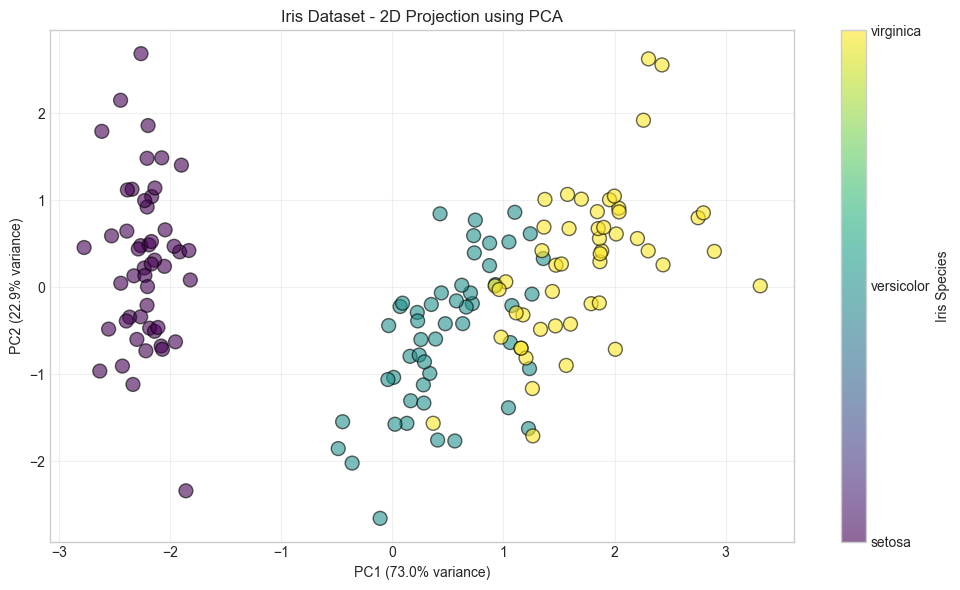

In [5]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create standardizer
standardizer = StandardScaler()

# Standardize features
X_std = standardizer.fit_transform(X)

# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualize the iris dataset in 2D
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=100, alpha=0.6, edgecolors='k')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_title('Iris Dataset - 2D Projection using PCA')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Iris Species')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(iris.target_names)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

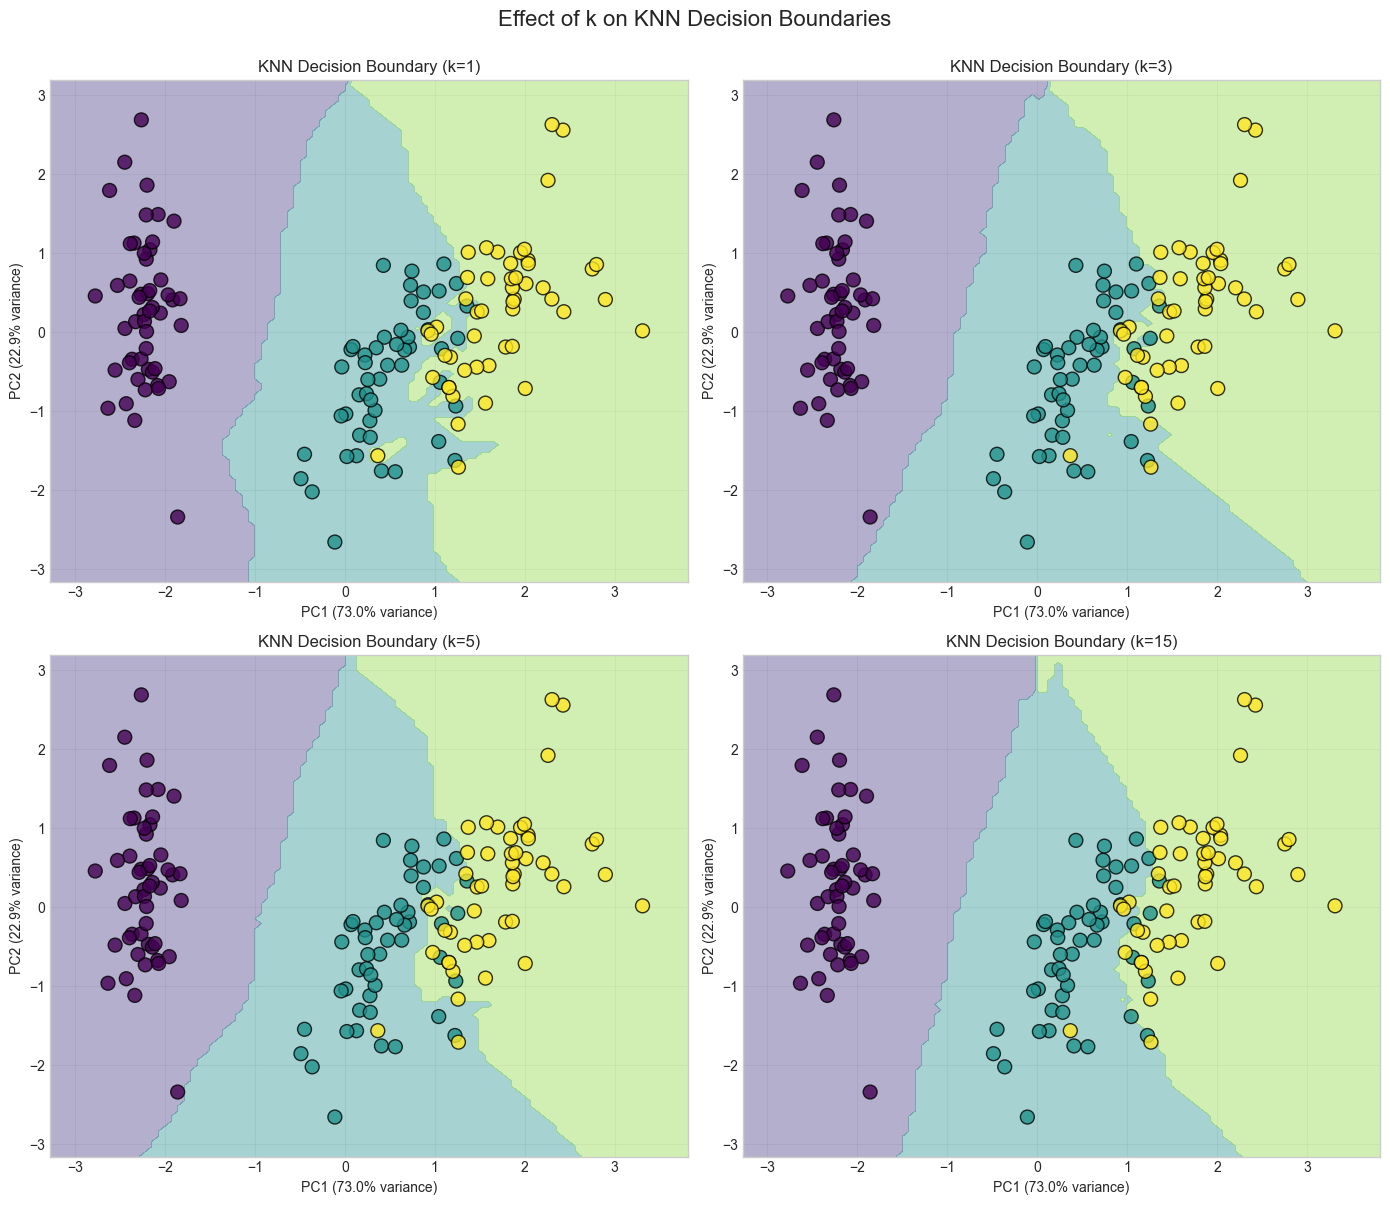


Observations:
- k=1: Very flexible, can overfit (high variance)
- k=3,5: Good balance between bias and variance
- k=15: Very smooth boundaries, may underfit (high bias)


In [6]:
# Visualize the effect of different k values on decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
k_values = [1, 3, 5, 15]

for ax, k in zip(axes.flat, k_values):
    # Create a mesh to plot decision boundaries
    x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
    y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Train KNN with current k value
    knn_k = KNeighborsClassifier(n_neighbors=k).fit(X_pca, y)

    # Predict for the mesh
    Z = knn_k.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and training points
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis', levels=2)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=100, alpha=0.8, edgecolors='k')

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    ax.set_title(f'KNN Decision Boundary (k={k})')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, alpha=0.3)

plt.suptitle('Effect of k on KNN Decision Boundaries', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

print("\nObservations:")
print("- k=1: Very flexible, can overfit (high variance)")
print("- k=3,5: Good balance between bias and variance")
print("- k=15: Very smooth boundaries, may underfit (high bias)")

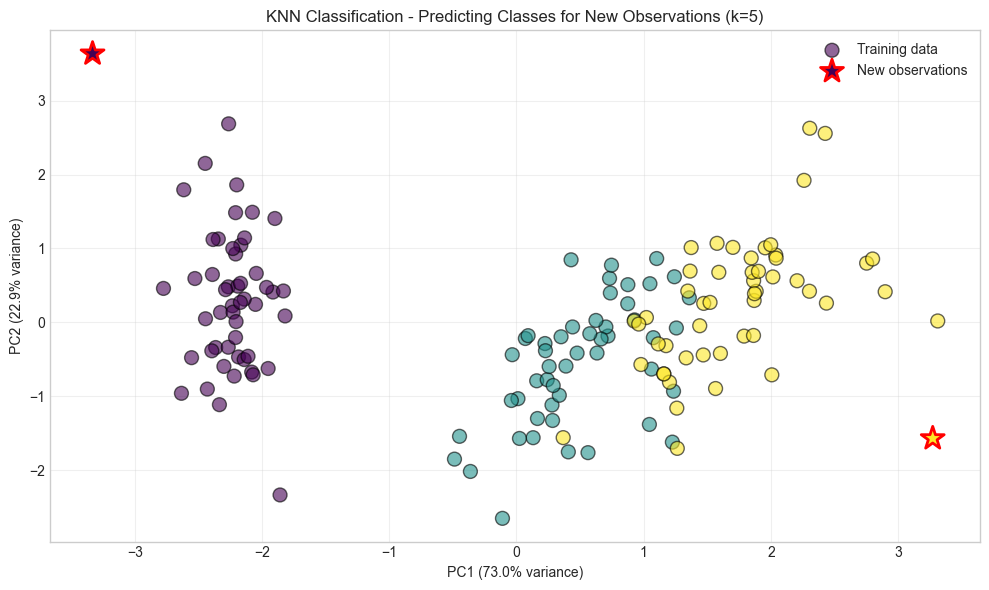

New observations predictions: [np.str_('setosa'), np.str_('virginica')]


In [7]:
# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_pca, y)

# Create two observations (in PCA space for visualization)
new_observations_original = np.array([[ 5, 5, 0.5, 0.5], [ 1, 3, 3, 10]])
new_observations_std = standardizer.transform(new_observations_original)
new_observations = pca.transform(new_observations_std)

# Predict the class of two observations
predictions = knn.predict(new_observations)

# Visualize predictions with new observations
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=100, alpha=0.6, edgecolors='k', label='Training data')
ax.scatter(new_observations[:, 0], new_observations[:, 1], c=predictions, cmap='viridis', s=300, marker='*',
           edgecolors='red', linewidths=2, label='New observations')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_title('KNN Classification - Predicting Classes for New Observations (k=5)')
ax.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"New observations predictions: {[iris.target_names[p] for p in predictions]}")

In KNN, given an observation, $x_u$, with an unknown target class, the algorithm first identifies the k closest observations (sometimes called $x_u$'s neighborhood) based on some distance metric (e.g., Euclidean distance), then these k observations "vote" based on their class, and the class that wins the vote is $x_u$'s predicted class. More formally, the probability $x_u$ of some class $j$ is:

$$ P(y=j|x_u) = \frac{1}{k} \sum_{i \in N_k(x_u)} I(y_i = j) $$

where $N_k(x_u)$ is the set of k nearest neighbors of $x_u$, $y_i$ is the class of observation $i$, and $I$ is an indicator function that is 1 if $y_i = j$ and 0 otherwise. The predicted class for $x_u$ is the class that maximizes this probability.

In [8]:
# View probability that each observation is one of three classes
knn.predict_proba(new_observations)

array([[1., 0., 0.],
       [0., 0., 1.]])

The class with the highest probability becomes the predicted class. For example, in the preceding output, the first observation should be class 0 $(P = 1)$ while the second observation should be class 2 $(P = 1)$, and this is just what we see:

In [9]:
knn.predict(new_observations)

array([0, 2])

`KNeighborsClassifier` contains a number of important parameters to consider.
First, `metric` sets the distance metric used. Second, `n_jobs` determines how many of the computer’s cores to use. Because making a prediction requires calculating the distance from a point to every single point in the data, using multiple cores is highly recommended. Third, `algorithm` sets the method used to calculate the nearest neighbors. While there are real differences in the algorithms, by default `KNeighborsClassifier` attempts to auto-select the best algorithm so you often don’t need to worry about this parameter. Fourth, by default `KNeighborsClassifier` works how we described previously, with each observation in the neighborhood getting one vote; however, if we set the `weights` parameter to distance, the closer observations’ votes are weighted more than observations farther away. Intuitively this make sense, since more similar neighbors might tell us more about an observation’s class than others.

Finally, because distance calculations treat all features as if they are on the same scale, it is important to standardize the features prior to using a KNN classifier.

#### 2.3.8.3 Identifying the Best Neighborhood Size (k)

Use model selection techniques like `GridSearchCV`:

In [10]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create standardizer
standardizer = StandardScaler()

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features, target)

The size of $k$ has real implications in KNN classifiers. In machine learning we are trying to find a balance between bias and variance, and in few places is that as explicit as the value of $k$. If $k = n$, where $n$ is the number of observations, then we have high bias but low variance. If $k = 1$, we will have low bias but high variance. The best model will come from finding the value of $k$ that balances this bias-variance trade-off. In our solution, we used GridSearchCV to conduct five-fold cross-validation on KNN classifiers with different values of $k$. When that is completed, we can see the k that
produces the best model:

In [11]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

**Note**: In KNN classification, an observation’s class is predicted from the classes of its $k$ neighbors. A less common technique is classification in a radius-based nearest neighbor (RNN) classifier, where an observation’s class is predicted from the classes of all observations within a given radius $r$.

In scikit-learn, `RadiusNeighborsClassifier` is very similar to `KNeighborsClassifier`, with the exception of two parameters. First, in `RadiusNeighborsClassifier` we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius. Unless there is some substantive reason for setting radius to some value, it’s best to treat it like any other hyperparameter and tune it during model selection. The second useful parameter is `outlier_label`, which indicates what label to give an observation that has no observations within the radius—which itself can be a useful tool for identifying outliers.

```python
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standardized, target)
 ```

### 2.3.9 Bayesian Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being useful as a quick-and-dirty baseline for a classification problem. This section will provide an intuitive explanation of how naive Bayes classifiers work, followed by a few examples of them in action on some datasets.

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes’s theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we’re interested in finding the probability of a label $y$ given some observed features, which we can write as $P(y|\text{features})$. Bayes’s theorem tells us how to express this in terms of quantities we can compute more directly:

$$ P(y|x_1,...,x_j) = \frac{P(x_1,...,x_j|y) \cdot P(y)}{P(x_1,...,x_j)} $$

Where:

* $P(y|x_1,...,x_j)$ is called the *posterior* and is the probability that an observation is class $y$ given the observation’s values for the $j$ features, $x1, …, xj$.

* $P(x_1,...,x_j|y)$ is called the *likelihood* and is the likelihood of an observation’s values for features $x1, …, xj$ given their class, $y$.

* $P(y)$ is called the *prior* and is our belief for the probability of class $y$ before looking at the data.

* $P(x_1,...,x_j)$ is called the *marginal probability*.

In naive Bayes, we compare an observation’s posterior values for each possible class. Specifically, because the marginal probability is constant across these comparisons, we compare the numerators of the posterior for each class. For each observation, the class with the greatest posterior numerator becomes the predicted class, $\hat{y}$.

There are two important things to note about naive Bayes classifiers. First, for each feature in the data, we have to assume the statistical distribution of the likelihood, $P(x_j∣y)$. The common distributions are the normal (Gaussian), multinomial, and Bernoulli distributions. The distribution chosen is often determined by the nature of features (continuous, binary, etc.). Second, naive Bayes gets its name because we assume that each feature, and its resulting likelihood, is independent. This “naive” assumption is frequently wrong yet in practice does little to prevent building highquality classifiers.

Such a model is called a generative model because it specifies the hypothetical random process that generates the data.

#### 2.3.9.1 Gaussian Naive Bayes

The most common type of naive Bayes classifier is the Gaussian naive Bayes. In
Gaussian naive Bayes, we assume that the likelihood of the feature values $x$, given an observation is of class $y$, follows a normal distribution:

$$ P(x_j|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_j - \mu_y)^2}{2\sigma_y^2}\right) $$

Where $\mu_y$ and $\sigma_y^2$ are the mean and variance of feature $x_j$ for all observations in class $y$. Because of the assumption of the normal distribution, Gaussian naive Bayes is best used in cases where all our features are continuous.

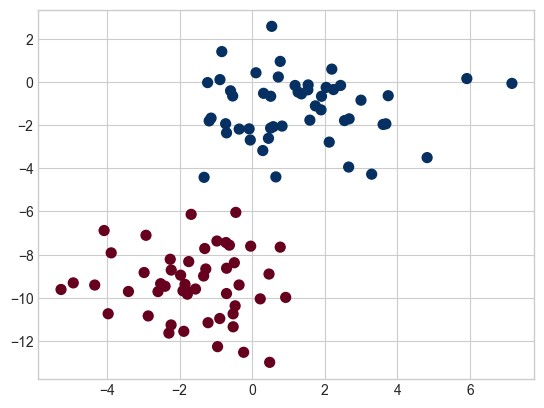

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

The simplest Gaussian model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by computing the mean and standard deviation of the points within each label, which is all we need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure, where we see the contours of the Gaussian distributions fit to each class in the two-dimensional dataset:

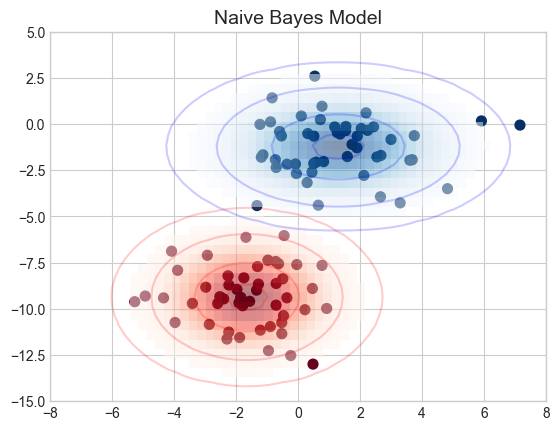

In [13]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolormesh(xx, yy, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's', shading='auto')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim);

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood $P(\text{features}|y)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn’s `sklearn.naive_bayes.GaussianNB` estimator:

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

,priors,None
,var_smoothing,1e-09


In [15]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is (see the following figure):

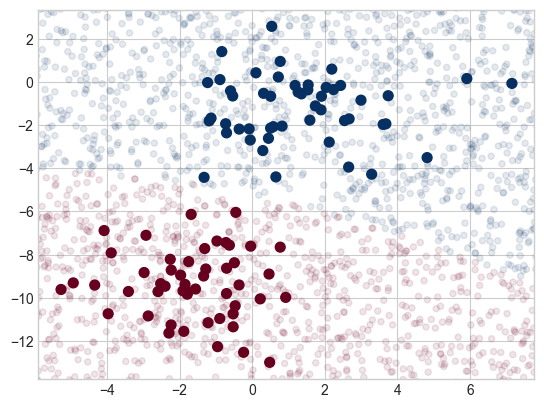

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary produced by a Gaussian naive Bayes model will be quadratic.

A nice aspect of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the `predict_proba` method:

In [17]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second labels, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a good place to start.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a reliable method.

#### 2.3.9.2 Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model it with a best-fit multinomial distribution.

**Example: Classifying Text**

In [18]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories and download the training and testing sets:

In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [20]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data and predict labels for the test data:

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, let's take a look at the confusion matrix between the true and predicted labels for the test data (see the following figure):

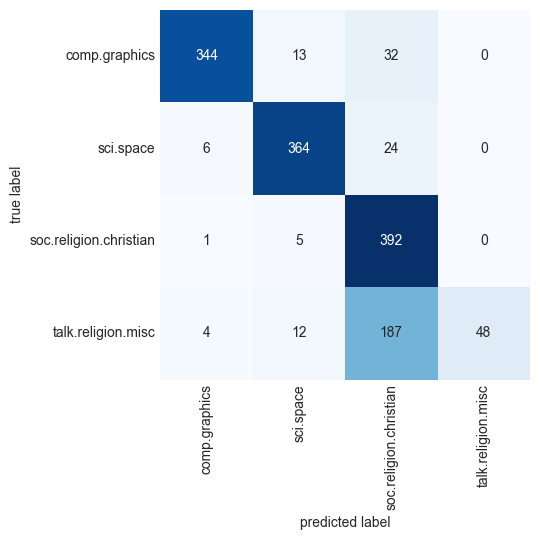

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.ylabel('true label')
plt.xlabel('predicted label');

Evidently, even this very simple classifier can successfully separate space discussions from computer discussions, but it gets confused between discussions about religion and discussions about Christianity. This is perhaps to be expected!

The cool thing here is that we now have the tools to determine the category for any string, using the predict method of this pipeline. Here's a utility function that will return the prediction for a single string:

In [24]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [25]:
predict_category('sending a payload to the ISS')

'sci.space'

In [26]:
predict_category('discussing the existence of God')

'soc.religion.christian'

In [27]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

#### 2.3.9.3 When to Use Naive Bayes Classifiers

Because naive Bayes classifiers make such stringent assumptions about data, they will generally not perform as well as more complicated models. That said, they have several advantages:

* They are fast for both training and prediction.
* They provide straightforward probabilistic prediction.
* They are often easily interpretable.
* They have few (if any) tunable parameters.

These advantages mean a naive Bayes classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in the following situations:

* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimensionality of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like the ones discussed here tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

### 2.3.10 Support Vector Machines (SVM)

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both **classification** and **regression**. In this section, we will explore the intuition behind SVMs and their use in classification problems.

They technically perform binary classification only, but Scikit-Learn enables them to do multiclass classification as well using techniques discussed in previous sections.

Scikit-Learn  makes building SVMs easy with classes such as `SVC` (short for support vector classifier) for classification models and `SVR` (support vector regressor) for regression models. You can use these classes without understanding how SVMs work, but you’ll get more out of them if you do  understand how they work. It’s also important to know how to tune SVMs for individual datasets and how to prepare data before you train a model. Toward the end of this chapter, we’ll build an SVM that performs facial recognition. But first, let’s look behind the scenes and discover why SVMs are often the go-to mechanism for modeling real-world datasets.

#### 2.3.10.1 How SVMs Work?

As part of our discussion of Bayesian classification, we learned about
a simple kind of model that describes the distribution of each underlying class, and experimented with using it to probabilistically determine labels for new points. That was an example of **generative classification**; here we will consider instead **discriminative classification**. That is, rather than modeling each class, we will simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

As an example of this, consider the simple case of a classification task in which the two classes of points are well separated (see the following figure):

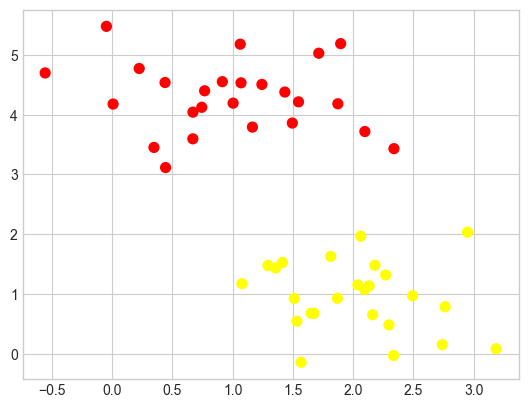

In [28]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two-dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw some of them as follows; the following figure shows the result:

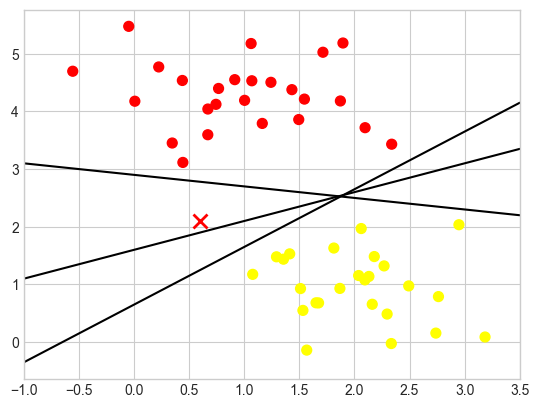

In [29]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not good enough, and we need to think a bit more deeply.

**Maximizing the margin**

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look (see the following figure):

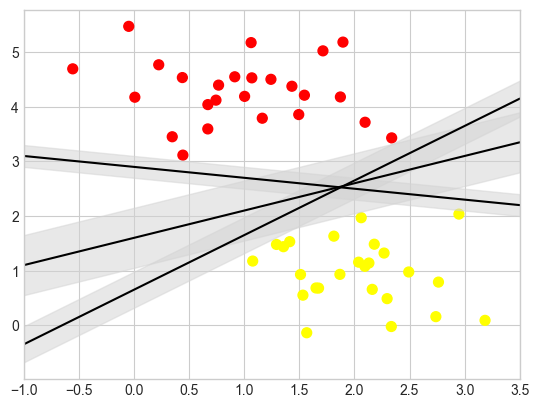

In [30]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5);

The line that maximizes this margin is the one we will choose as the optimal model.

#### 2.3.10.2 Fitting an SVM Model with Scikit-Learn

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier (`SVC`) to train an SVM model on this data. For the time being, we will use a linear kernel and set the `C` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily):

In [31]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

,C,10000000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us (see the following figure):

In [32]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

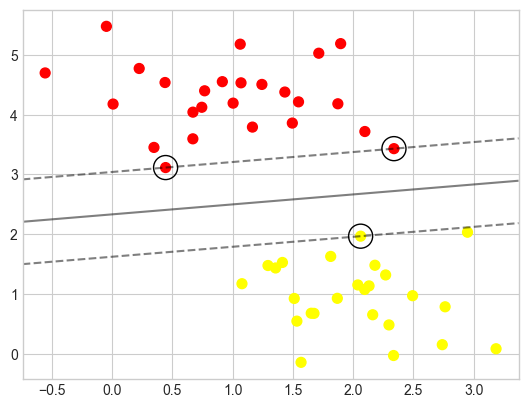

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are circled in the following figure. These points are the pivotal elements of this fit; they are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identities of these points are stored in the `support_vectors_` attribute of the classifier:

In [34]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the positions of the support vectors matter; any points further from the margin that are on the correct side do not modify the fit. Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset (see the following figure):

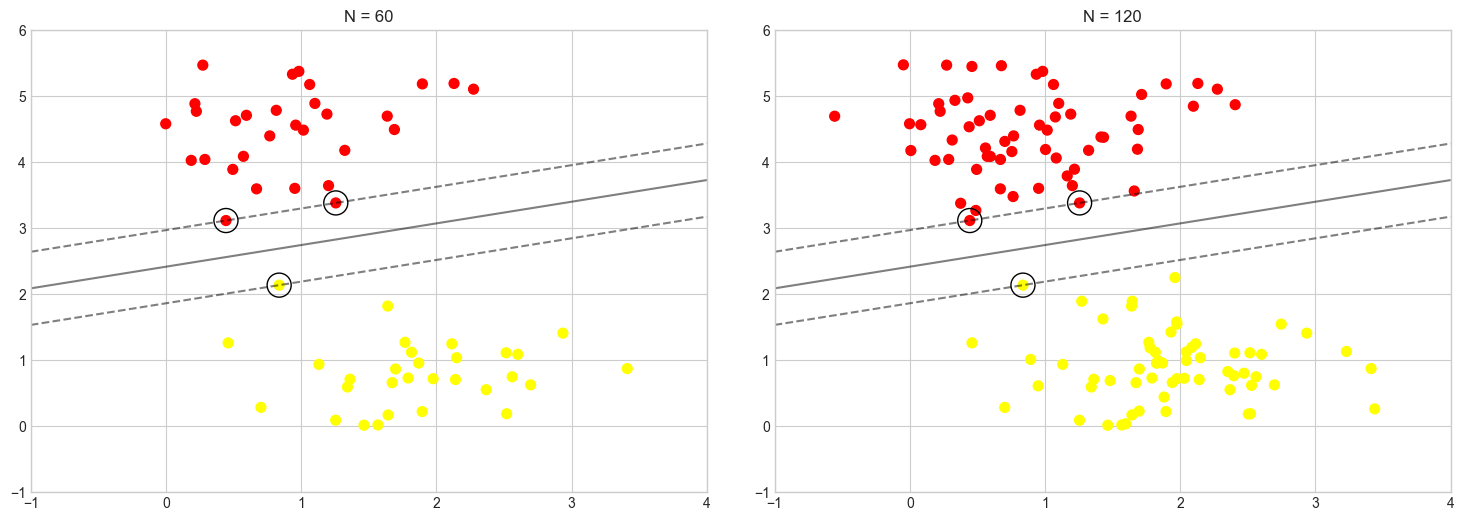

In [35]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors in the left panel are the same as the support vectors in the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

```bash
pip install ipywidgets
```

In [36]:
from ipywidgets import interact, Output

out = Output()

def plot_svm_interactive(N=10):
    with out:
        out.clear_output(wait=True)
        _, ax = plt.subplots(figsize=(8, 6))
        plot_svm(N, ax)
        plt.show()

interact(plot_svm_interactive, N=(10, 200, 10))
out

interactive(children=(IntSlider(value=10, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

Output()

#### 2.3.10.3 Kernel SVM

Where SVM can become quite powerful is when it is combined with kernels. We have seen a version of kernels before. There we projected our data into a higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to reduce dimensionality and fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea. To motivate the need for kernels, let’s look at some data that is not linearly separable

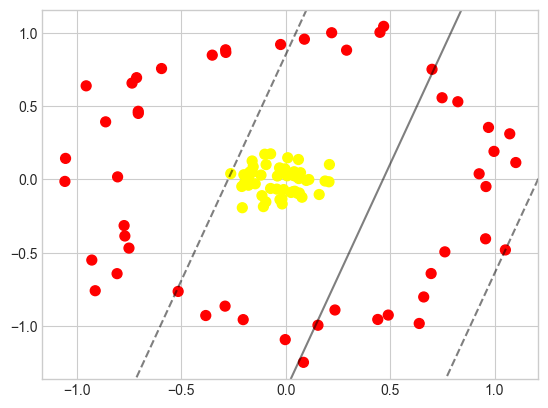

In [37]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will ever be able to separate this data. But we can draw a lesson from the radial basis function kernel in Introduction to Data Science: Dimensionality Reduction, and think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function (RBF) centered on the middle clump:

In [38]:
r = np.exp(-(X ** 2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot, as seen in the following figure:

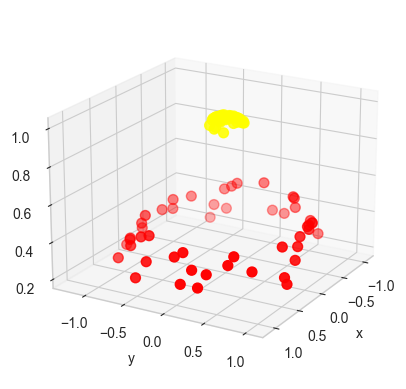

In [39]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, $r=0.7$.

In this case we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting $N$ points into $N$ dimensions—is that it might become very computationally intensive as $N$ grows large. However, because of a neat little procedure known as the [kernel trick](https://en.wikipedia.org/wiki/Kernel_trick), a fit on kernel-transformed data can be done implicitly—that is, without ever building the full $N$-dimensional representation of the kernel projection. This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF kernel, using the `kernel` model hyperparameter:

In [40]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Let's use our previously defined function to visualize the fit and identify the support vectors (see the following figure):

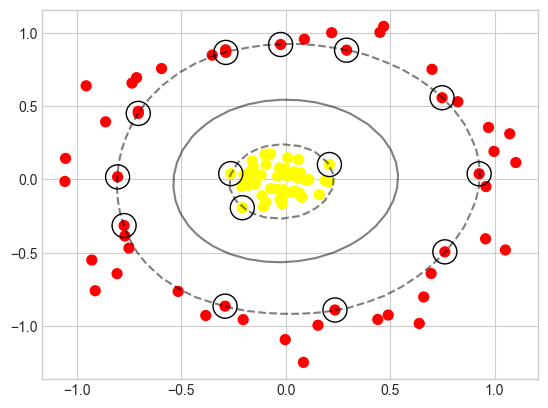

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

#### 2.3.10.4 Tuning the SVM Model: Softening Margins with C

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this (see the following figure):

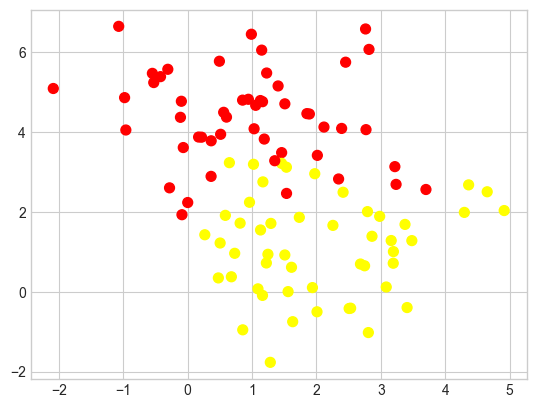

In [42]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

To handle this case, the SVM implementation has a bit of a fudge factor that "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as `C`. For a very large `C`, the margin is hard, and points cannot lie in it. For a smaller `C`, the margin is softer and can grow to encompass some points.

The plot shown in the following figure gives a visual picture of how a changing `C` affects the final fit via the softening of the margin:

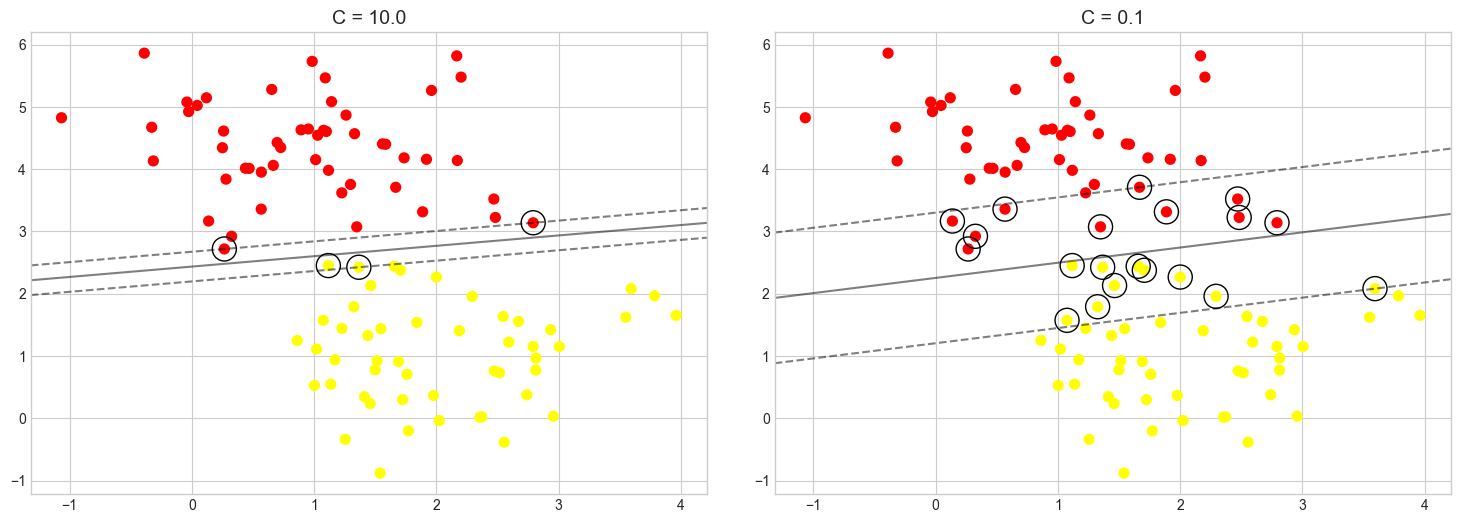

In [43]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In other words, the `C` parameter controls how aggressively the model fits to the training data. The higher the value, the tighter the fit and the higher the risk of overfitting. The default is `C=1` in Scikit, but you can specify a different value to adjust the fit.

It’s difficult to know what the right value of `C` is (that is, the value that provides the best balance between underfitting and overfitting the training data and yields the best results when the model is run with test data).

For the RBF and polynomial kernels, there’s another value called `gamma` that affects accuracy. And for polynomial kernels, the `degree` parameter impacts the model’s ability to learn from the training data.

As we've seen earlier, to aid in the process of hyperparameter tuning, Scikit provides a family of optimizers that includes `GridSearchCV`, which tries all combinations of a specified set of parameter values with built-in cross-validation to determine which combination produces the most accurate model. These optimizers prevent you from having to write code to do a brute-force search using all the unique combinations of parameter values. To be clear, they do brute-force searches themselves by training the model multiple times, each time with a different combination of values. At the end, you can retrieve the most accurate model from the `best_estimator_` attribute, the parameter values that produced the most accurate model from the `best_params_` attribute, and the best score from the `best_score_` attribute.

Here’s an example that uses Scikit’s `SVC` class to implement an SVM classifier. This uses the RBF kernel with `C=1`. You can specify the kernel type and values for `C` and `gamma` this way:
```python
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)
```

Suppose you wanted to try two different kernels and five values each for `C`  and `gamma` to see which combination produces the best results. Rather than write a nested for loop, you could do this:

```python
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.25, 0.5, 0.75, 1.0]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid.fit(X_train, y_train)  # Train the model with different parameter combinations
```

The call to fit  won’t return for a while. It trains the model 250 times  since there are 50 different combinations of `kernel`, `C`, and `gamma`, and `cv=5`  says to use fivefold cross-validation to assess the results. Once training is complete, you retrieve the best model this way:

```python
best_model  =  grid.best_estimator_
```

It is not uncommon to run a search regimen such as this one multiple times—the first time with course parameter values, and each time thereafter with narrower ranges of values centered on the values obtained from `best_params_`. More training time up front is the price you pay for an accurate model. To reiterate, you can almost always make an SVM more accurate by finding the optimum combination of parameters. And for better or worse, brute force is the most effective way to identify the best combination.

**Note**:

SVMs usually train better with data that is normalized to unit variance. That’s true even if the values in all the columns have similar ranges, but it’s especially true if they don’t have similar ranges. Scikit’s `StandardScaler` class applies unit variance to data. Unit variance is achieved by dividing the values in a column by the mean of all the values in the column and dividing by the standard deviation. Scikit’s `make_pipeline` function enables you to combine transformers such as `StandardScaler` and classifiers such as `SVC` into one logical unit to ensure that data passed to `fit` and `predict` undergoes the same transformations.

![Unnormalized data plotted with equally scaled axes](https://github.com/emilianodesu/SIAFI-2026-1/blob/main/ML/img/unnormalized.png?raw=1)

![Data normalized with MinMaxScaler](https://github.com/emilianodesu/SIAFI-2026-1/blob/main/ML/img/normalized.png?raw=1)

#### 2.3.10.5 Face recognition Example

As an example of support vector machines in action, let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [44]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with (see the following figure):

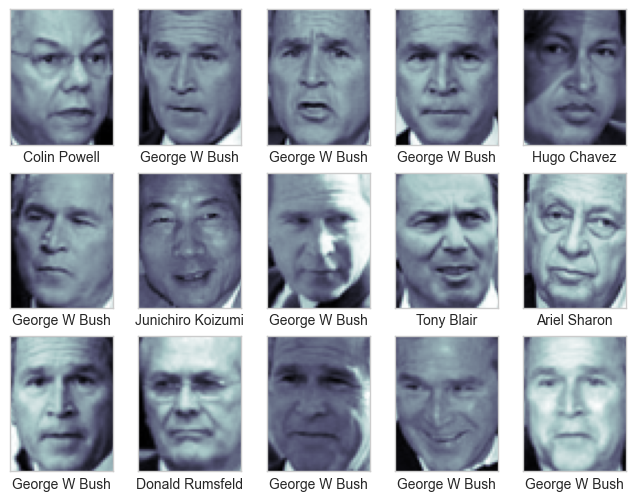

In [45]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains $62 \times 47$, or around $3,000$, pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use principal component analysis (see PCA in Dimensionality Reduction) to extract $150$ fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [46]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

For the sake of testing our classifier output, we will split the data into a training set and a testing set:

In [47]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use grid search cross-validation to explore combinations of parameters. Here we will adjust `C` (which controls the margin hardness) and `gamma` (which controls the size of the radial basis function kernel), and determine the best model:

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 1min 40s
Wall time: 32.3 s
{'svc__C': 5, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model we can predict the labels for the test data, which the model has not yet seen:

In [49]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values (see the following figure):

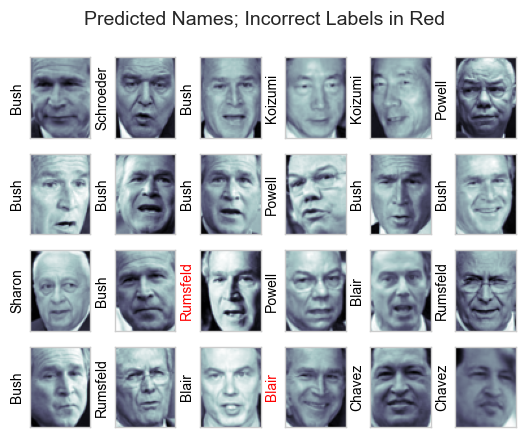

In [50]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only two faces. We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes (see the following figure):

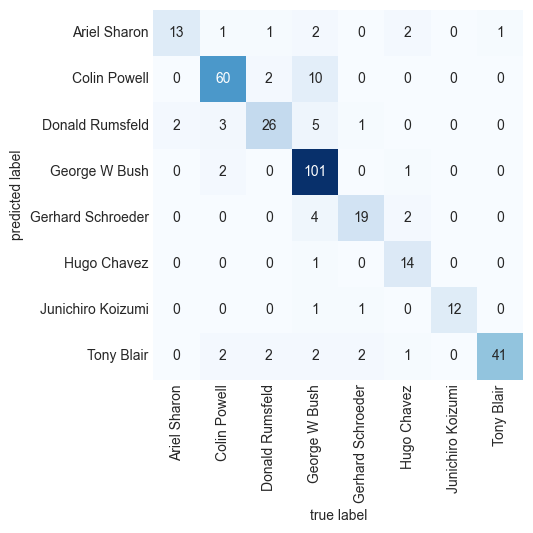

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation. For this kind of application, one good option is to make use of [OpenCV](http://opencv.org/), which, among other things, includes pretrained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.

#### 2.3.10.6 Summmary

This has been a brief intuitive introduction to the principles behind support vector machines. These models are a powerful classification method for a number of reasons:

* Their dependence on relatively few support vectors means that they are compact and take up very little memory.
* Once the model is trained, the prediction phase is very fast.
* Because they are affected only by points near the margin, they work well with
high-dimensional data—even data with more dimensions than samples, which is
challenging for other algorithms.
* Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:
* The scaling with the number of samples $N$ is $O(N^3)$ at worst, or $O(N^2)$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
* The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
* The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the `probability` parameter of `SVC`), but this extra estimation is costly.

#### **For Further Exploration**

Check out these resources to deepen your understanding of classification algorithms:

* [K-nearest neighbors, Clearly Explained](https://youtu.be/HVXime0nQeI?si=S_cgU8xu6yyiUQSL)
* [K-nearest Neighbors (KNN) in 3 min](https://youtu.be/gs9E7E0qOIc?si=clOp6bDwCJcy3VMY)
* [Naive Bayes, Clearly Explained!!!](https://youtu.be/O2L2Uv9pdDA?si=AsgTbI7o2JXAupgq)
* [Gaussian Naive Bayes, Clearly Explained!!!](https://youtu.be/H3EjCKtlVog?si=kUmnMO3orxd_LG0F)
* [Support Vector Machine (SVM) in 2 minutes](https://youtu.be/_YPScrckx28?si=Y4jnUSdxkM8FQofX)
* [Support Vector Machines Part 1 (of 3): Main Ideas!!!](https://youtu.be/efR1C6CvhmE?si=3iCtBlMPlNcsSbrk)
* [The Kernel Trick in Support Vector Machine (SVM)](https://youtu.be/Q7vT0--5VII?si=8boxSzgKOIdn0b9T)

---
**References:**

Disclaimer: Some of the material in this notebook is adapted from other sources. These references are provided for further reading and to acknowledge the original authors.

* Chapter 41, 43 Python Data Science Handbook, [2nd edition](https://learning.oreilly.com/library/view/python-data-science/9781098121211/)

* Chapter 15, 18 Machine Learning with Python Cookbook, [2nd edition](https://learning.oreilly.com/library/view/machine-learning-with/9781098135713/)